___
# PROJETO 1

## <font color='red'>Otavio Siaulys Cardoso</font>
___

## <font color='blue'>APOSENTADOS 2014 X APOSENTADOS 1992</font>

## Introdução

No ano de 2014, cerca de 10% da polpulação brasileira. Devido a este fator não é surpreendente encontrar uma mulher que tenha mais de 60 anos ou um homem com mais de 65 que ainda trabalhe. Isso faz com que uma grande parcela dos aposentados no Brasil ainda exerça atividade remunerada. Logo, uma posível análise seria comparar os aposentados que ainda trabalham de 1992 com os de 2014.

Exemplifique identificando uma pesquisa semelhante feita no Brasil ou no exterior que compare uma parcela da população (apossentados, imigrantes, mulheres, jovens) com todo resto. Critique esta pesquisa (que tipo de variáveis usou? Que recurso de estatística descritiva?). Pode ser um artigo de jornal.





___
## Análise e Resultados dos dados de 2014

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/otaviocardoso/Desktop/Projeto 1 -CD


In [42]:
#Leitura da base já em formato de DataFrame e extensão .csv
dados = pd.read_table('PES2014.txt', sep=',')
dados2 = pd.read_table('PES1992.txt', sep=',')

In [43]:
n = dados.shape[0]
n2 = dados2.shape[0]

In [121]:
#Variáveis 2014
dados.IDADE = dados..astype('category')
dados.APOSENTADO = dados.V9122.astype('category')
dados.APOSENTADO.cat.categories=('Aposentado', 'Não aposentado')
dados.SEXO = dados.V0302.astype('category')
dados.SEXO.cat.categories=('Homens', 'Mulheres')
dados.COR_RACA = dados.V0404.astype('category')
dados.COR_RACA .cat.categories=('Indígena', 'Brancos', 'Preta', 'Amarela', 'Pardos', 'Sem declaração')
dados.RENDIMENTO_MENSAL = dados.V4722.astype('float')
dados.RENDIMENTO_SAL_MIN = dados.V4743.astype('category')
#dados.RENDIMENTO_SAL_MIN.cat.categories=('Até 1/4 salário mínimo', 'Mais de 1/4 até 1/2 salário mínimo','Mais de 1/2 até 1 salário mínimo','Mais de 1 até 2 salários mínimos','Mais de 2 até 3 salários mínimos','Mais de 3 até 5 salários mínimos','Mais de 5','Sem declaração')
dados.CASADO = dados.V4111.astype('category')
dados.CASADO.cat.categories=('Casado', 'Não casado atualmente', 'Nunca casou')

#Variáveis 1992
dados2.IDADE = dados2..astype('category')
dados2.APOSENTADO = dados2.v9122.astype('category')
dados2.APOSENTADO.cat.categories=('Aposentado', 'Não aposentado')
dados2.SEXO = dados2.v0302.astype('category')
dados2.SEXO.cat.categories=('Homens', 'Mulheres')
dados2.COR_RACA = dados2.v0404.astype('category')
dados2.COR_RACA.cat.categories = ('Indígena', 'Brancos', 'Preta', 'Amarela', 'Pardos', 'Sem declaração')
dados2.CASADO = dados2.v1001.astype('category')
dados2.CASADO.cat.categories = ('Casado', 'Não casado atualmente', 'Nunca casou')
dados2.RENDIMENTO_MENSAL = dados2.v4721.astype('float')
dados2.RENDIMENTO_SAL_MIN = dados.V4743.astype('category')
#dados2.RENDIMENTO_SAL_MIN.cat.categories=('Até 1/4 salário mínimo', 'Mais de 1/4 até 1/2 salário mínimo','Mais de 1/2 até 1 salário mínimo','Mais de 1 até 2 salários mínimos','Mais de 2 até 3 salários mínimos','Mais de 3 até 5 salários mínimos','Mais de 5','Sem declaração')

In [107]:
print('2014 - Frequência por cor ou raça:')
ut0= (dados.COR_RACA.value_counts(True)*100).round(decimals=2)
print(ut0,'\n')

print('1992 - Frequência por cor ou raça:')
ut00= (dados2.COR_RACA.value_counts(True)*100).round(decimals=2)
print(ut00,'\n')

2014 - Frequência por cor ou raça:
Pardos            47.94
Brancos           42.27
Preta              8.91
Indígena           0.49
Amarela            0.39
Sem declaração     0.00
dtype: float64 

1992 - Frequência por cor ou raça:
Brancos           51.59
Pardos            42.53
Preta              5.48
Amarela            0.32
Indígena           0.09
Sem declaração     0.00
dtype: float64 



In [108]:
print('2014 - Frequência de aposentadoria:')
ut1= (dados.APOSENTADO.value_counts(True)*100).round(decimals=2)
print(ut1,'\n')

print('1992 - Frequência de aposentadoria:')
ut11= (dados2.APOSENTADO.value_counts(True)*100).round(decimals=2)
print(ut11,'\n')

2014 - Frequência de aposentadoria:
Não aposentado    27311800
Aposentado         3864300
dtype: int64 

1992 - Frequência de aposentadoria:
Não aposentado    71.82
Aposentado         5.99
dtype: float64 



In [123]:
print('2014 - Frequência de aposentadoria feminina:')
ut2 = (dados.APOSENTADO[(dados.SEXO=='Mulheres')].value_counts(True)*100).round(decimals=2)
print(ut2,'\n')
print('1992 - Frequência de aposentadoria feminina:')
ut22 = (dados2.APOSENTADO[(dados2.SEXO=='Mulheres')].value_counts(True)*100).round(decimals=2)
print(ut22,'\n')

print('2014 - Frequência de mulheres aposentadas por raça ou cor:')
ut20 = (dados.COR_RACA[(dados.APOSENTADO=='Aposentado')&(dados.SEXO=='Mulheres')].value_counts(True)*100).round(decimals=2)
print(ut20,'\n')
print('1992 - Frequência de mulheres aposentadas por raça ou cor:')
ut220 = (dados2.COR_RACA[(dados2.APOSENTADO=='Aposentado')&(dados2.SEXO=='Mulheres')].value_counts(True)*100).round(decimals=2)
print(ut220,'\n')

2014 - Frequência de aposentadoria feminina:
Não aposentado    76.12
Aposentado        10.50
dtype: float64 

1992 - Frequência de aposentadoria feminina:
Não aposentado    73.66
Aposentado         4.85
dtype: float64 

2014 - Frequência de mulheres aposentadas por raça ou cor:
Brancos           51.67
Pardos            38.74
Preta              8.54
Amarela            0.62
Indígena           0.43
Sem declaração     0.00
dtype: float64 

1992 - Frequência de mulheres aposentadas por raça ou cor:
Brancos           57.16
Pardos            35.02
Preta              7.28
Amarela            0.45
Indígena           0.09
Sem declaração     0.01
dtype: float64 



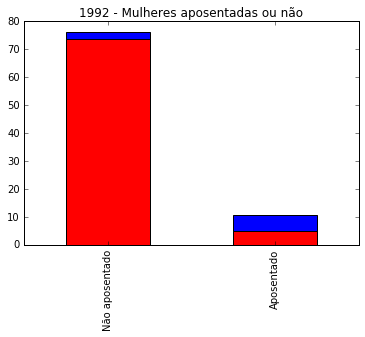

In [124]:
ut2.plot(kind='bar',title='2014 - Mulheres aposentadas ou não',color=('b','b'))
ut22.plot(kind='bar',title='1992 - Mulheres aposentadas ou não',color=('r','r'))
#plt.ylabel('Frequência Relativa (em%)')
#plt.xlabel('Não Aposentadas             Aposentadas')

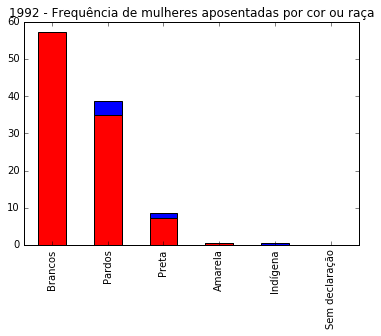

In [125]:
ut20.plot(kind='bar',title='2014 - Frequência de mulheres aposentadas por cor ou raça',color=('b','b'))
ut220.plot(kind='bar',title='1992 - Frequência de mulheres aposentadas por cor ou raça',color=('r','r'))
#plt.ylabel('Frequência Relativa (em%)')
#plt.xlabel('Cor ou raça')

In [112]:
print('2014 - Frequência de aposentadoria para homens:')
ut3 = (dados.APOSENTADO[dados.SEXO=='Homens'].value_counts()/n*100).round(decimals=2)
print(ut3,'\n')
print('1992 - Frequência de aposentadoria para homens:')
ut33 = (dados2.APOSENTADO[dados2.SEXO=='Homens'].value_counts()/n2*100).round(decimals=2)
print(ut33,'\n')


print('2014 - Frequência de homens aposentados por cor ou raça:')
ut30 = (dados.COR_RACA[(dados.APOSENTADO=='Aposentado')&(dados.SEXO=='Homens')].value_counts()/n*100).round(decimals=2)
print(ut30,'\n')
print('1992 - Frequência de homens aposentados por cor ou raça:')
ut330 = (dados2.COR_RACA[(dados2.APOSENTADO=='Aposentado')&(dados2.SEXO=='Homens')].value_counts()/n2*100).round(decimals=2)
print(ut330,'\n')

2014 - Frequência de aposentadoria para homens:
Não aposentado    36.09
Aposentado         5.24
dtype: float64 

1992 - Frequência de aposentadoria para homens:
Não aposentado    34.17
Aposentado         3.51
dtype: float64 

2014 - Frequência de homens aposentados por cor ou raça:
Brancos           2.64
Pardos            2.07
Preta             0.49
Amarela           0.03
Indígena          0.02
Sem declaração    0.00
dtype: float64 

1992 - Frequência de homens aposentados por cor ou raça:
Brancos           2.04
Pardos            1.22
Preta             0.24
Amarela           0.02
Indígena          0.00
Sem declaração    0.00
dtype: float64 



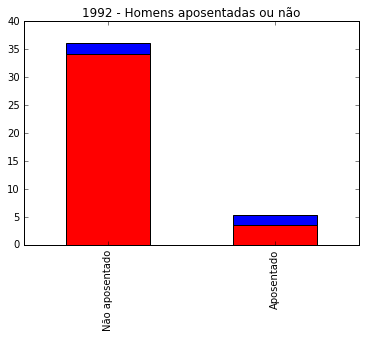

In [113]:
ut3.plot(kind='bar',title='2014 - Homens aposentadas ou não',color=('b','b'))
ut33.plot(kind='bar',title='1992 - Homens aposentadas ou não',color=('r','r'))
#plt.ylabel('Frequência Relativa (em%)')
#plt.xlabel('Não Aposentadas             Aposentadas')

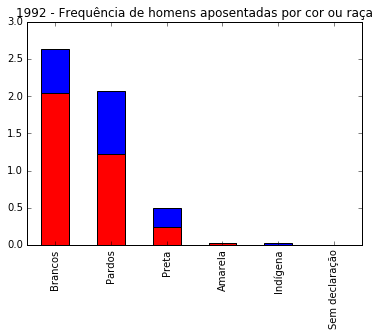

In [114]:
ut30.plot(kind='bar',title='2014 - Frequência de homens aposentadas por cor ou raça',color=('b','b'))
ut330.plot(kind='bar',title='1992 - Frequência de homens aposentadas por cor ou raça',color=('r','r'))

#plt.ylabel('Frequência Relativa (em%)')
#plt.xlabel('Cor ou raça')

In [115]:
print("2014 - rendimento mensal per capita de homens aposentados, casados e brancos")
a = dados.RENDIMENTO_MENSAL_C[(dados.RENDIMENTO_MENSAL_C <331200)&(dados.CASADO=='Casado') & (dados.APOSENTADO =='Aposentado') & (dados.SEXO == 'Homens') & (dados.COR_RACA == 'Brancos')]
print(a.describe())
print()
print("1992 - rendimento domiciliar de homens aposentados, casados e brancos")
e = dados2.RENDIMENTO_MENSAL_C[(dados.RENDIMENTO_MENSAL_C <331200)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.SEXO == 'Homens') & (dados.COR_RACA == 'Brancos')]
print(e.describe())

2014 - rendimento mensal per capita de homens aposentados, casados e brancos
count     7161.000000
mean      4636.155286
std       5508.135150
min        682.000000
25%       1600.000000
50%       2798.000000
75%       5200.000000
max      63500.000000
Name: V4722, dtype: float64

1992 - rendimento mensal per capita de homens aposentados, casados e brancos
count    6.263000e+03
mean     2.331433e+10
std      1.509026e+11
min      0.000000e+00
25%      9.100000e+05
50%      1.760000e+06
75%      3.473593e+06
max      1.000000e+12
Name: v4721, dtype: float64


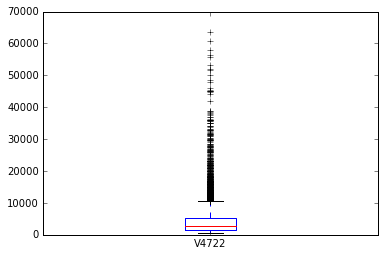

In [116]:
a.plot (kind='box') 
#e.plot (kind ='box')

In [117]:
print("2014 - rendimento mensal domiciliar de homens aposentados, casados e pardos")
b = dados.RENDIMENTO_MENSAL_C[(dados.RENDIMENTO_MENSAL_C <999999999999)&(dados.CASADO== 'Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.SEXO == 'Homens') & (dados.COR_RACA == 'Pardos')]
print(b.describe())
print()
print("1992 - rendimento mensal domiciliar de homens aposentados, não casados e pardos")
f = (dados2.RENDIMENTO_MENSAL_C[(dados.RENDIMENTO_MENSAL_C <999999999999)&(dados.CASADO== 'Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.SEXO == 'Homens') & (dados.COR_RACA == 'Pardos')])/275000
print(f.describe())

2014 - rendimento mensal per capita de homens aposentados, casados e pardos
count     5361.000000
mean      3116.663309
std       3469.796326
min        722.000000
25%       1448.000000
50%       2124.000000
75%       3400.000000
max      52000.000000
Name: V4722, dtype: float64

1992 - rendimento mensal per capita de homens aposentados, não casados e pardos
count    4.807000e+03
mean     8.776025e+04
std      5.580832e+05
min      0.000000e+00
25%      2.761273e+00
50%      5.498804e+00
75%      1.127273e+01
max      3.636364e+06
Name: v4721, dtype: float64


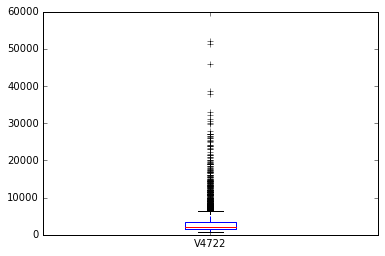

In [95]:
b.plot (kind='box') 
#f.plot (kind='box')

In [119]:
print("2014 - rendimento domiciliar de mulheres aposentadas, casadas e brancas")
c = dados.RENDIMENTO_MENSAL_C[(dados.RENDIMENTO_MENSAL_C <331200)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.SEXO == 'Mulheres') & (dados.COR_RACA == 'Brancos')]
print(c.describe())
print()
print("1992 - rendimento domiciliar de mulheres aposentadas, casadas e brancas")
g = dados2.RENDIMENTO_MENSAL_C[(dados.RENDIMENTO_MENSAL_C <331200)&(dados.CASADO=='Casado') & (dados.APOSENTADO == 'Aposentado') & (dados.SEXO == 'Mulheres') & (dados.COR_RACA == 'Brancos')]
print(g.describe())

2014 - rendimento domiciliar de mulheres aposentadas, casadas e brancas
count      4559.000000
mean       4980.359947
std        6391.680651
min         700.000000
25%        1674.500000
50%        2820.000000
75%        5472.000000
max      153000.000000
Name: V4722, dtype: float64

1992 - rendimento domiciliar de mulheres aposentadas, casadas e brancas
count    3.968000e+03
mean     1.764402e+10
std      1.316594e+11
min      0.000000e+00
25%      9.016395e+05
50%      1.705686e+06
75%      3.400000e+06
max      1.000000e+12
Name: v4721, dtype: float64


In [ ]:
faixa = np.arange(80.000000, 331200.000000, 331120/362627)
variávelCat = pd.cut(dados.RENDIMENTO_MENSAL_C, faixa) 
variávelCat.value_counts()

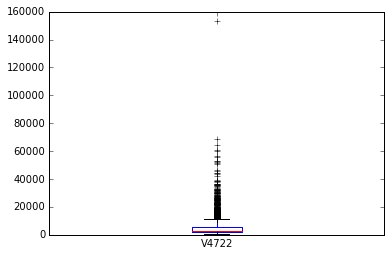

In [66]:
c.plot (kind='box') 
#g.plot (kind='box') 

In [118]:
print("2014 - rendimento domiciliar de mulheres aposentadas, casadas e pardas")
d = dados.RENDIMENTO_MENSAL_C[(dados.RENDIMENTO_MENSAL_C <331200)&(dados.CASADO=='Casado') & (dados.APOSENTADO =='Aposentado') & (dados.SEXO == 'Mulheres') & (dados.COR_RACA == 'Pardos')]
print(d.describe())
print()
print("1992 - rendimento domiciliar de mulheres aposentadas, casadas e pardas")
h = dados2.RENDIMENTO_MENSAL_C[(dados.RENDIMENTO_MENSAL_C <331200)&(dados.CASADO=='Casado') & (dados.APOSENTADO =='Aposentado') & (dados.SEXO == 'Mulheres' ) & (dados.COR_RACA =='Pardos')]
print(h.describe())

2014 - rendimento domiciliar de mulheres aposentadas, casadas e pardas
count     3305.000000
mean      3036.823298
std       3518.779843
min        660.000000
25%       1448.000000
50%       2024.000000
75%       3124.000000
max      76000.000000
Name: V4722, dtype: float64

1992 - rendimento domiciliar de mulheres aposentadas, casadas e pardas
count    2.966000e+03
mean     2.933482e+10
std      1.687646e+11
min      0.000000e+00
25%      7.000000e+05
50%      1.418000e+06
75%      2.921640e+06
max      1.000000e+12
Name: v4721, dtype: float64


In [ ]:
d.plot (kind='box') 
#h.plot (kind='box') 

Com base nos resultados, pode-se concluir que homens aposentados, brancos, casados tem uma renda mensal per capita maior do que os aposentados, pardos e casados. O mesmo pode ser dito para as mulheres

In [ ]:
#faixa = np.arange(80.000000, 331200.000000, 331120/362627)
#variávelCat = pd.cut(dados.RENDIMENTO_MENSAL_C, faixa) 
#variávelCat.value_counts()

In [ ]:
#grafico = dados.RENDIMENTO_MENSAL_C.plot.hist(bins=faixa)

___
## Conclusão 

Apartir da análise feita anteriormente, pode-se dizer que de 1992 para 2014, a porcentagem de mulheres, aposentados, pardos aumentaram. No entanto, enquanto em 1992, haviam mais homens aposentados do qaue mulheres, em 2014 esses papeis se inverteram. Além disso, ao compararmos os homens aposentados brancos e casados nesses dois anos, chegamos à conclusão de que os de 1992 tem uma renda domiciliar do que os de 2014 (considerando inflação e a mudança de moeda segundo o site : http://www.fee.rs.gov.br/servicos/atualizacao-valores/?ano=1992&mes=janeiro&valor=1

## Fontes

http://www.fee.rs.gov.br/servicos/atualizacao-valores/?ano=1992&mes=janeiro&valor=1